In [9]:
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt

# Establish a connection to the PostgreSQL database
connection = pg.connect(
    dbname="Bitcoin",
    user="postgres",
    password="Rz@11109",
    host="localhost",
    port="5432"
)
database_table_name = 'bitcoin_talk'

# Query to fetch existing post_id values
select_query = "SELECT * FROM {} ORDER BY post_timestamp".format(database_table_name)

df = pd.read_sql(select_query, con=connection)
df.head()

,post_id,post_url,post_timestamp,post_page,post_author,post_full,post_no_quote,topic_name,sentiment_compound,sentiment_positive,sentiment_negative,inserted_timestamp
0,483368,https://bitcointalk.org/index.php?topic=39621....,2011-08-26 23:33:56,1,Maged,Because a certain site has been spammed to hel...,Because a certain site has been spammed to hel...,One thread per site ONLY,0.4475,0.073,0.062,2023-08-16
1,483420,https://bitcointalk.org/index.php?topic=39621....,2011-08-27 00:10:33,1,tysat,Hooray for less spam!,Hooray for less spam!,One thread per site ONLY,0.3367,0.461,0.283,2023-08-16
2,483423,https://bitcointalk.org/index.php?topic=39621....,2011-08-27 00:11:58,1,Weaver,"Hey,Is a new tournament for poker considered n...","Hey,Is a new tournament for poker considered n...",One thread per site ONLY,0.4926,0.313,0.000,2023-08-16
3,483431,https://bitcointalk.org/index.php?topic=39621....,2011-08-27 00:16:44,1,Maged,"Quote from: Weaver on August 27, 2011, 12:11:5...","No, not unless there is something notable abou...",One thread per site ONLY,0.7650,0.118,0.027,2023-08-16
4,483578,https://bitcointalk.org/index.php?topic=39621....,2011-08-27 01:43:00,1,Cory,What is considered newsworthy? If I offer a ne...,What is considered newsworthy? If I offer a ne...,One thread per site ONLY,0.3485,0.053,0.000,2023-08-16


C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127813 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128184 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127813 missing from curre

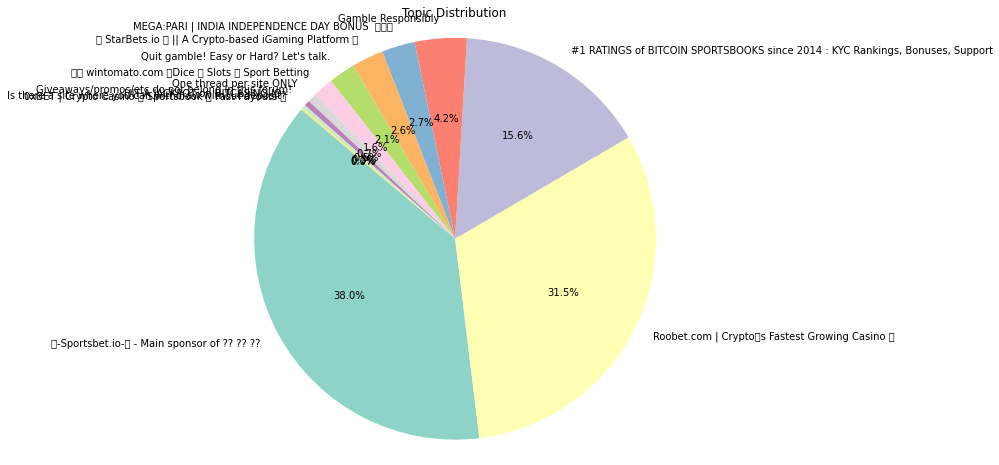

In [10]:
# Calculate topic distribution
topic_distribution = df['topic_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(topic_distribution, labels=topic_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Topic Distribution')
plt.axis('equal')
plt.show()

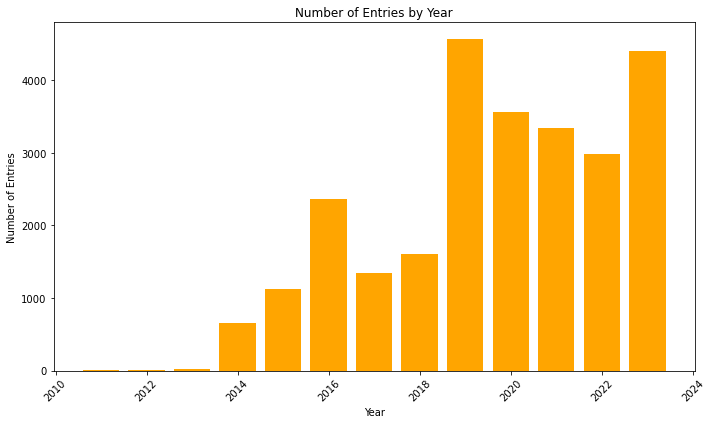

In [11]:
# Group data by year and count occurrences
yearly_counts = df['post_timestamp'].dt.year.value_counts().sort_index()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='orange')

plt.title('Number of Entries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

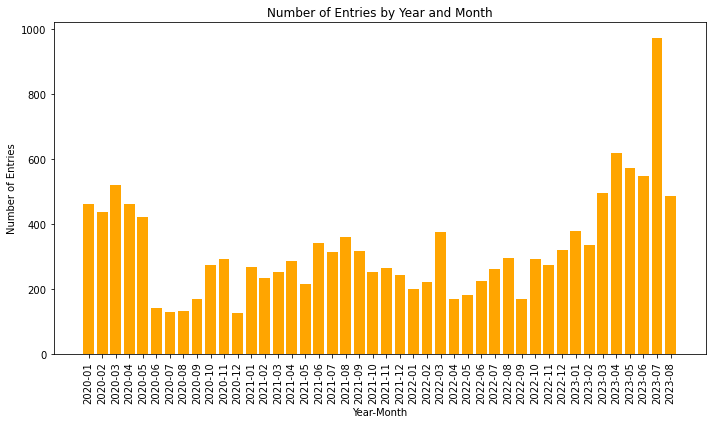

In [13]:
graph_df = df[df['post_timestamp'] >= pd.Timestamp('2020-01-01')]

# Group data by year and month and count occurrences
year_month_counts = graph_df.groupby([graph_df['post_timestamp'].dt.year.rename('year'), graph_df['post_timestamp'].dt.month.rename('month')]).size().reset_index(name='count')

# Create a new column with combined 'year-month' format
year_month_counts['year_month'] = year_month_counts['year'].astype(str) + '-' + year_month_counts['month'].astype(str).str.zfill(2)

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(year_month_counts['year_month'], year_month_counts['count'], color='orange')

plt.title('Number of Entries by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

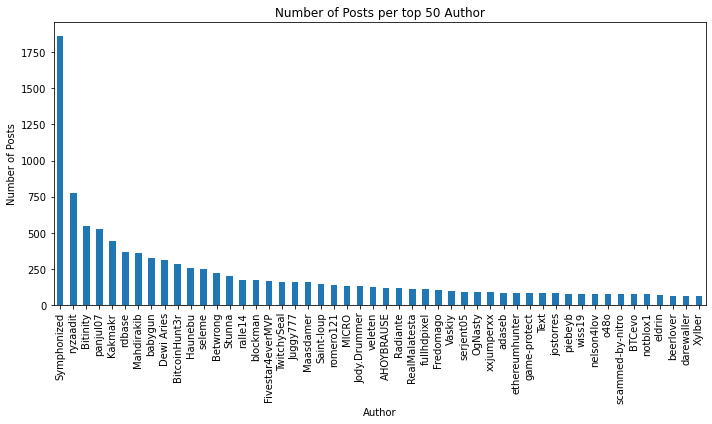

In [5]:
# Count posts per author
posts_per_author = df['post_author'].value_counts()[:50]

# Create a bar chart
plt.figure(figsize=(10, 6))
posts_per_author.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per top 50 Author')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


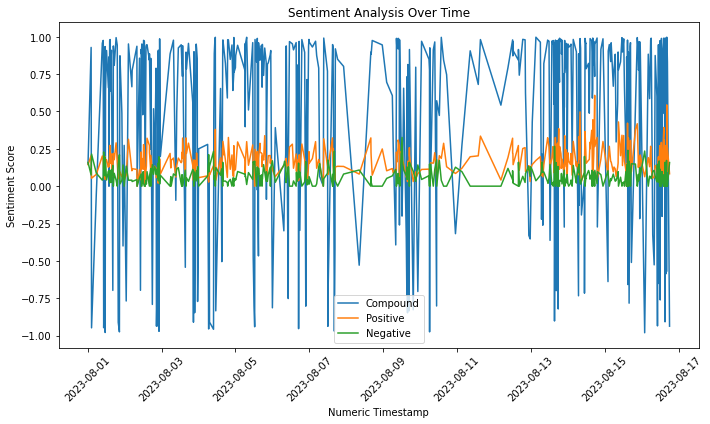

In [14]:
df.dropna(subset=['sentiment_compound', 'sentiment_positive', 'sentiment_negative', 'post_timestamp'], inplace=True)
graph_df = df[df['post_timestamp'] >= pd.Timestamp('2023-08-01')]

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_compound'].values, label='Compound')
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_positive'].values, label='Positive')
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_negative'].values, label='Negative')

plt.title('Sentiment Analysis Over Time')
plt.xlabel('Numeric Timestamp')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

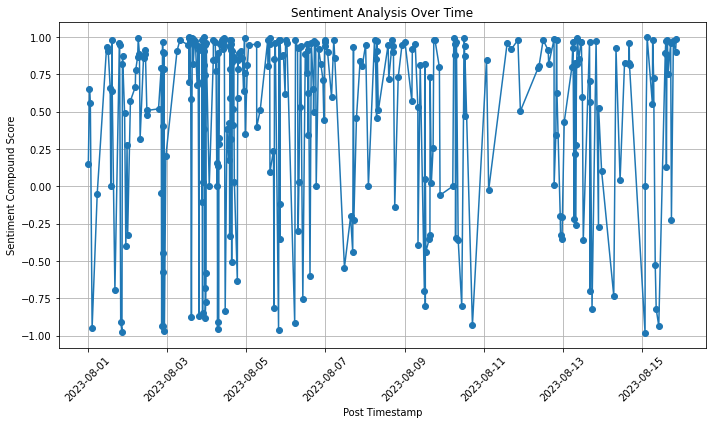

In [7]:
# Compound Score
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_compound'].values, marker='o')
plt.xlabel('Post Timestamp')
plt.ylabel('Sentiment Compound Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

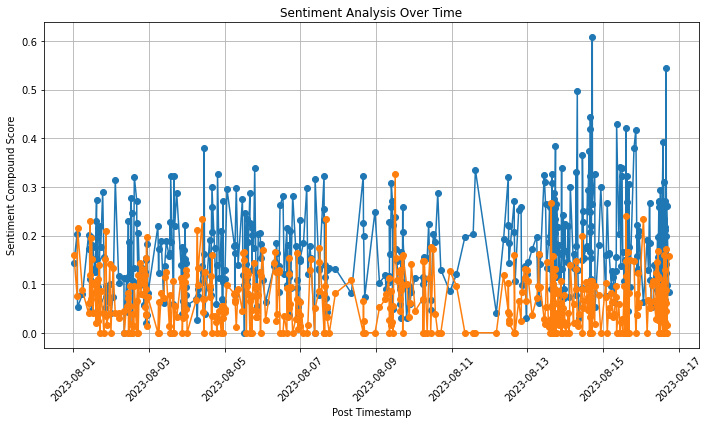

In [16]:
# Compound Score
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_positive'].values, marker='o', label='Positive')
plt.plot(graph_df['post_timestamp'].values, graph_df['sentiment_negative'].values, marker='o', label='Negative')
plt.xlabel('Post Timestamp')
plt.ylabel('Sentiment Compound Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()